In [2]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
training = pd.read_csv('basic_match_events_training.csv')
training.head()

Unnamed: 0  id_partido  id_equipo_local  id_equipo_visitante  CENTRO_local  \
0           0           1                1                    2           0.0   
1           1           2                3                    4          11.0   
2           2           3                5                    6           8.0   
3           3           4                7                    8           4.0   
4           4           5                9                   10           0.0   

   CENTRO DE SAQUE DE BANDA_local  CORNER_local  FALTA_local  GOL_local  \
0                             0.0           0.0          0.0        2.0   
1                             0.0          10.0          5.0        1.0   
2                             0.0           2.0          6.0        0.0   
3                             1.0           8.0          9.0        2.0   
4                             0.0           0.0          0.0        2.0   

   GOL ANULADO_local  ...  GOL ANULADO_visitante  PENALTY FUERA_visitante  \
0                0.0  ...                    0.0                      0.0   
1                0.0  ...                    0.0                      0.0   
2                0.0  ...                    0.0                      0.0   
3                0.0  ...                    0.0                      0.0   
4                0.0  ...                    0.0                      0.0   

   PENALTY PARADO_visitante  PENALTY REPETIDO_visitante  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   SEGUNDA TARJETA AMARILLA AL JUGADOR_visitante  TARJETA AMARILLA_visitante  \
0                                            0.0                         3.0   
1                                            0.0                         0.0   
2                                            0.0                         0.0   
3                                            0.0                         0.0   
4                                            0.0                         2.0   

   TARJETA ROJA_visitante  TIRO A PORTERIA_visitante  TIRO FUERA_visitante  \
0                     0.0                        0.0                   0.0   
1                     0.0                        0.0                   2.0   
2                     0.0                        4.0                   2.0   
3                     0.0                        1.0                   5.0   
4                     0.0                        0.0                   0.0   

   ganador  
0        0  
1        1  
2        2  
3        1  
4        1  

[5 rows x 33 columns]

In [39]:
y = training.ganador
X = training.drop(['ganador', 'id_equipo_visitante', 'id_equipo_local', 'Unnamed: 0', 'id_partido'], axis=1)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=False)

In [55]:
bt = xgb.XGBClassifier(max_depth=50,
                       learning_rate=0.9,
                       n_estimators=100,
                       objective='multi:softmax')   # Setup xgboost model
bt.fit(X_train, y_train, # Train it to our data
       eval_set=[(X_valid, y_valid)], 
       verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
       max_depth=50, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

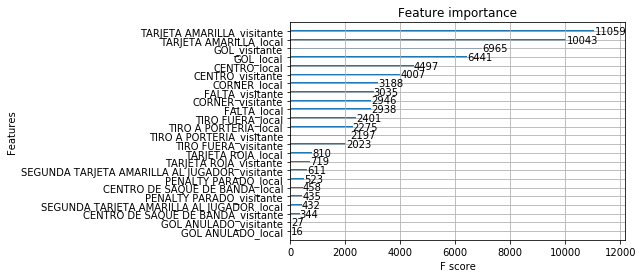

In [56]:
%matplotlib inline  
xgb.plot_importance(bt)

In [57]:
from sklearn.metrics import accuracy_score

y_predict = bt.predict(X_valid)

accuracy_score(y_valid, y_predict)

0.5684615384615385

In [58]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_predict, average='micro')

0.5684615384615385

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_predict)

array([[ 83, 149,  97],
       [ 83, 428,  62],
       [ 79,  91, 228]])